In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [197]:
df=pd.read_csv("framingham.csv")

In [198]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [199]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [200]:
df.shape

(4238, 16)

In [201]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [203]:
nominal=["male","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]
Continues=["age","education","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

In [204]:
ref=dict()
for i in nominal:
    arr=df[i].value_counts()
    print(arr)
    ref[i]=arr

0    2419
1    1819
Name: male, dtype: int64
0    2144
1    2094
Name: currentSmoker, dtype: int64
0.0    4061
1.0     124
Name: BPMeds, dtype: int64
0    4213
1      25
Name: prevalentStroke, dtype: int64
0    2922
1    1316
Name: prevalentHyp, dtype: int64
0    4129
1     109
Name: diabetes, dtype: int64


# Missing Values Handling

In [205]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Insight: Null values present in education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose                                       

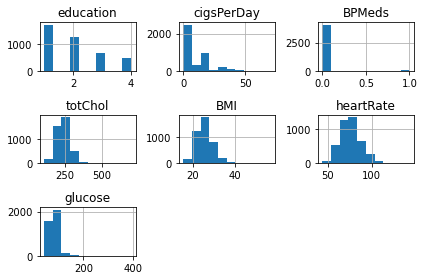

In [206]:
plt.Figure(figsize=(16,16))
df[["education","cigsPerDay","BPMeds","totChol","BMI","heartRate","glucose"]].hist()
plt.tight_layout()

Insight: ALl features are right skewed , so we can go for capping with its median values

In [207]:
missing_arr=["education","cigsPerDay","BPMeds","totChol","BMI","heartRate","glucose"]
for j in missing_arr:
       df.loc[df[j].isna(),j]=df[j].median()

In [208]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Outliers dertection & Handling

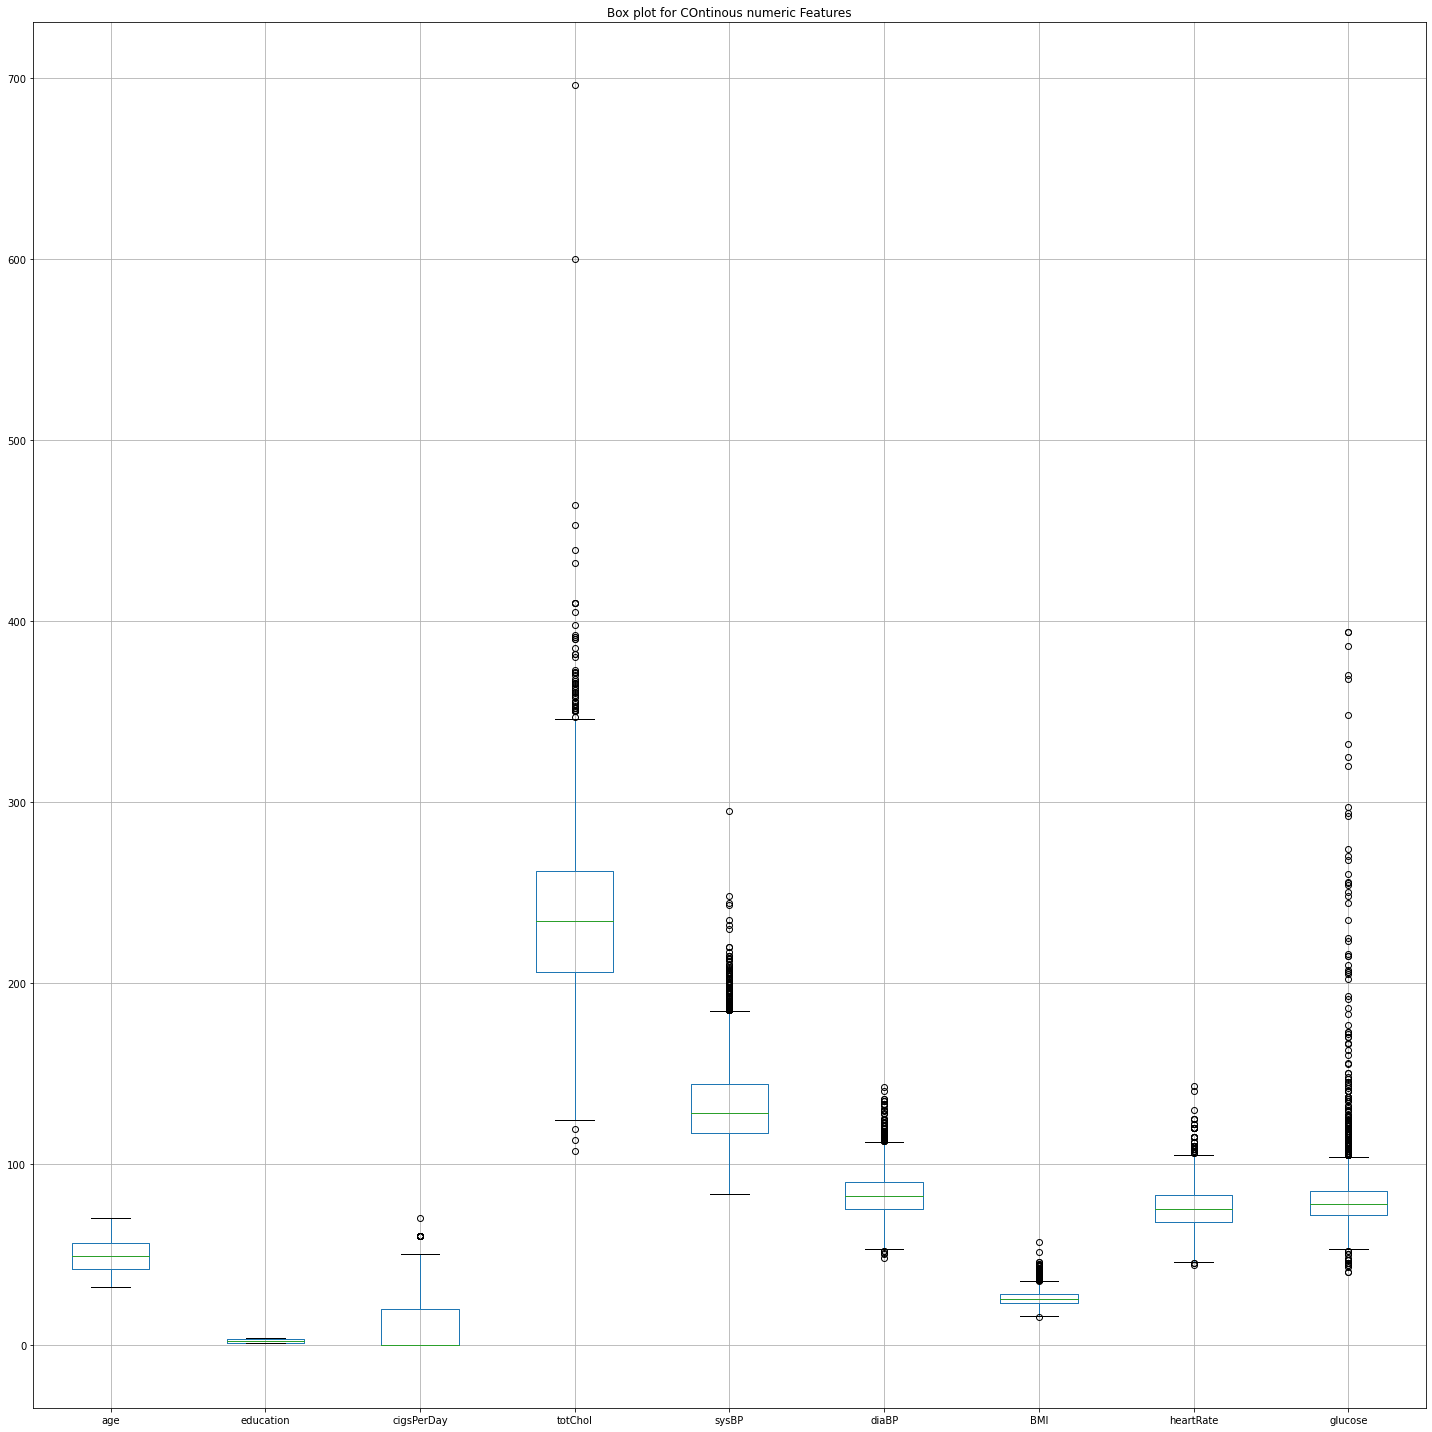

In [209]:
df[["age","education","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]].boxplot(figsize=(20,20))
plt.title("Box plot for COntinous numeric Features")
plt.tight_layout()

Insight: We will ot remove outliers from this dataset, since its medical record

# Encoding

Since there is no categorical feature, we cannot go for encoding

# Feature Reduction

<AxesSubplot:>

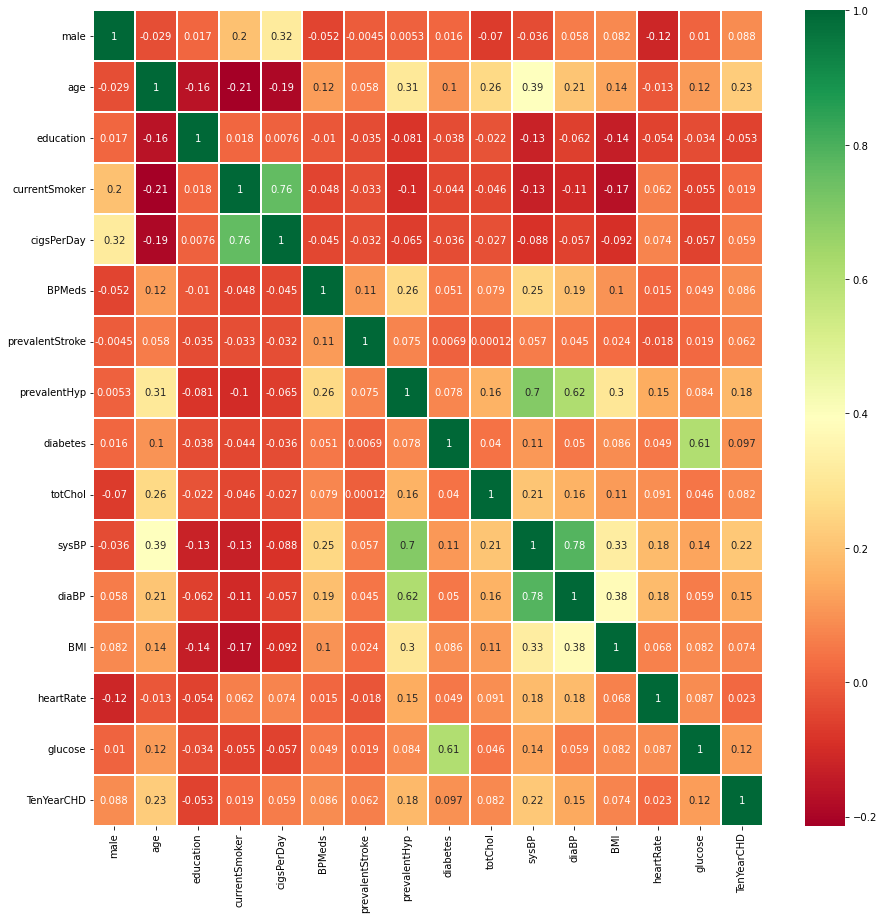

In [210]:
corrmatrix=df.corr()
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmatrix,annot=True,linewidths=0.2, cmap='RdYlGn')

In [211]:
# we can see that from the heatmap, Age & current smoker has high negative correlation
# so based on its coefiicient value with target variable, We will go for droping Age column
# there is no high positiva correlation

In [212]:
df.drop("age", axis=1, inplace=True)

In [213]:
df.columns

Index(['male', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Feature Engineering

In [214]:
df["mean arterial pressure (MAP)"]=((df["sysBP"]+ 2* df["diaBP"])/3).round(2)

In [215]:
def physical_load(a):
    if a>90:
        return "verHigh"
    elif 80<a<90:
        return "High"
    elif 70<a<80:
        return "Moderate"
    elif 60<a<70:
        return "Fair"
    else:
        return "Poor"

In [216]:
df["Heart_Rate_Variability"]=df["heartRate"].apply(lambda x:physical_load(x) )

In [217]:
df.head()

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,mean arterial pressure (MAP),Heart_Rate_Variability
0,1,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.00,Poor
1,0,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.33,verHigh
2,1,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.83,Moderate
3,0,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.33,Fair
4,0,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.33,High


In [218]:
def Weight(a):
    if 18.5<=a<24.9:
        return "Normal"
    elif 25<=a<29.9:
        return "Overweight"
    elif a>30:
        return "Obesity"

In [219]:
df["Weight"]=df["BMI"].apply(lambda x: Weight(x) )

# Label Encode -Feature High_Rate_Variability

In [220]:
from sklearn.preprocessing import LabelEncoder 

In [221]:
lbl=LabelEncoder()
df["Heart_Rate_Variability"]=pd.DataFrame(lbl.fit_transform(df["Heart_Rate_Variability"]))

In [222]:
df

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,mean arterial pressure (MAP),Heart_Rate_Variability,Weight
0,1,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.00,3,Overweight
1,0,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.33,4,Overweight
2,1,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.83,2,Overweight
3,0,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.33,0,Overweight
4,0,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.33,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,121.00,0,Overweight
4234,1,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,95.50,0,Normal
4235,0,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,91.67,1,Normal
4236,0,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0,100.17,1,Normal


In [223]:
df["currentSmoker"].value_counts()

0    2144
1    2094
Name: currentSmoker, dtype: int64

In [224]:
df[df["cigsPerDay"]!=0]

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,mean arterial pressure (MAP),Heart_Rate_Variability,Weight
2,1,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.83,2,Overweight
3,0,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.33,0,Overweight
4,0,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.33,1,Normal
7,0,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0,80.67,2,Normal
9,1,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0,125.33,4,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,0,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,78.0,0,124.67,3,Normal
4233,1,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,121.00,0,Overweight
4234,1,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,95.50,0,Normal
4235,0,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,91.67,1,Normal


In [225]:
#so we can remove column current smoker
df.drop("currentSmoker", axis=1, inplace=True)

In [226]:
df

,male,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,mean arterial pressure (MAP),Heart_Rate_Variability,Weight
0,1,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.00,3,Overweight
1,0,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.33,4,Overweight
2,1,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.83,2,Overweight
3,0,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.33,0,Overweight
4,0,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.33,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,121.00,0,Overweight
4234,1,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,95.50,0,Normal
4235,0,2.0,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,91.67,1,Normal
4236,0,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0,100.17,1,Normal


# One hot Encoding -Weight

In [227]:
df=pd.get_dummies(df, columns=['Weight'], drop_first=True)

In [228]:
df

,male,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,mean arterial pressure (MAP),Heart_Rate_Variability,Weight_Obesity,Weight_Overweight
0,1,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.00,3,0,1
1,0,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.33,4,0,1
2,1,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.83,2,0,1
3,0,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.33,0,0,1
4,0,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.33,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,121.00,0,0,1
4234,1,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,95.50,0,0,0
4235,0,2.0,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,91.67,1,0,0
4236,0,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0,100.17,1,0,0


# Standadisation

In [229]:
df.columns

Index(['male', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'mean arterial pressure (MAP)',
       'Heart_Rate_Variability', 'Weight_Obesity', 'Weight_Overweight'],
      dtype='object')

In [230]:
Continues

['age',
 'education',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [238]:
df["BPMeds"]=df["BPMeds"].astype("int64")

In [243]:
cols=df.select_dtypes("float64").columns
cols

Index(['education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'mean arterial pressure (MAP)'],
      dtype='object')

# Apply std scaling to COntinous numeric feature

In [241]:
from sklearn.preprocessing import StandardScaler

In [252]:
#df_con=df[['education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose', 'mean arterial pressure (MAP)']]
df_con=['education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose', 'mean arterial pressure (MAP)']
stds=StandardScaler()
for i in df_con:
    df[i]=pd.DataFrame(stds.fit_transform(df[[i]]))

In [253]:
df

,male,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,mean arterial pressure (MAP),Heart_Rate_Variability,Weight_Obesity,Weight_Overweight
0,1,2.006559,-0.751322,0,0,0,0,-0.940600,-1.195907,-1.082625,0.287379,0.342761,-0.201359,0,-1.203822,3,0,1
1,0,0.020387,-0.751322,0,0,0,0,0.300313,-0.515187,-0.158988,0.719752,1.590291,-0.245099,0,-0.349776,4,0,1
2,1,-0.972700,0.929210,0,0,0,0,0.187503,-0.220209,-0.242955,-0.113057,-0.073082,-0.507537,0,-0.245878,2,0,1
3,0,1.013473,1.769476,0,0,1,0,-0.263739,0.800871,1.016549,0.682902,-0.904768,0.935872,1,0.966271,0,0,1
4,0,1.013473,1.181289,0,0,0,0,1.089985,-0.106755,0.092912,-0.663350,0.758605,0.148558,0,-0.003448,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,-0.972700,-0.667296,0,0,1,0,1.721723,2.116930,0.764648,0.041713,-0.821599,0.192298,1,1.497539,0,0,1
4234,1,1.013473,2.861821,0,0,0,0,-0.669856,-0.265590,-0.242955,-1.496159,-0.904768,-0.595016,0,-0.268736,0,0,0
4235,0,0.020387,0.929210,0,0,0,0,0.255189,-0.061374,-0.914691,-0.933583,0.675436,0.192298,0,-0.534023,1,0,0
4236,0,-0.972700,0.509077,0,0,0,0,-0.602170,-0.265590,0.344813,-1.631275,0.841773,-0.157620,0,0.054735,1,0,0
